In [39]:
#Setup 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle, islice
%matplotlib inline 

dallas_df = pd.read_csv (r'C:\Users\kndrs\Project1\clean_shelter_data.csv',low_memory =False)
#dallas_df.head()
s = dallas_df['Year'] 
for i in range(len(s)):
    s1 = s[i]
    s[i] = int(s1[2:])
s.head()
dallas_df["Year"] =s 

C:\Users\kndrs\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
dallas_df.head()


,Unnamed: 0,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,Intake Total,...,Outcome Type,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
0,1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,6,OWNER SURRENDER,GENERAL,1,...,EUTHANIZED,7/21/2016,K16-353536,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,2016,NaN
1,2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,7,OWNER SURRENDER,GENERAL,1,...,TRANSFER,3/31/2016,K16-338470,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,2016,NaN
2,3,A0117773,DOG,PIT BULL,LAB 01,LAB,2,OWNER SURRENDER,EUTHANASIA REQUESTED,1,...,EUTHANIZED,7/5/2016,K16-351923,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,2016,NaN
3,4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,14,LOST REPORT,NaN,1,...,LOST REPORT,7/19/2016,K16-345201,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,2016,NaN
4,5,A0132276,CAT,DOMESTIC SH,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,1,...,RETURNED TO OWNER,9/27/2016,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,2016,NaN


In [72]:
# Sort out the year
dallas_adopted = dallas_df.loc[(dallas_df['Outcome Type'] == "RETURNED TO OWNER") 
                                | (dallas_df['Outcome Type']== 'ADOPTION'),
                               ['Outcome Type', 'Year','Animal Type']]

dallas_adopted




,Outcome Type,Year,Animal Type
4,RETURNED TO OWNER,2016,CAT
22,RETURNED TO OWNER,2016,DOG
33,RETURNED TO OWNER,2016,DOG
34,RETURNED TO OWNER,2016,DOG
36,ADOPTION,2016,CAT
...,...,...,...
172193,RETURNED TO OWNER,2021,DOG
172196,RETURNED TO OWNER,2021,DOG
172199,RETURNED TO OWNER,2021,DOG
172200,RETURNED TO OWNER,2021,DOG


In [136]:
# Convert year to numeric 

#dallas_adopted_df = dallas_adopted.apply(pd.to_numeric)
# Create a line  graph 

df = dallas_adopted["Year"].value_counts().head()

df

#y= dallas_adopted["Outcome Type"].values



#dallas_adopted.plot(x, y)

#plt.title('Total animals adopted per year')
#plt.ylabel("Number of animals")

2019    22712
2018    17820
2020    13845
2017    13836
2016    10257
Name: Year, dtype: int64

Text(0, 0.5, 'Number of animals')

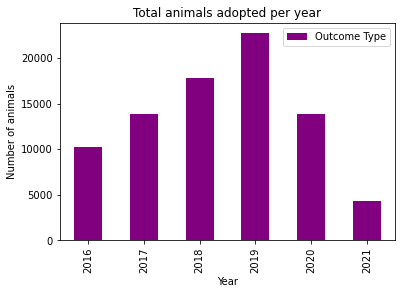

In [59]:
# Create a basic bar graph 
dallas_adopted_year = pd.DataFrame(dallas_adopted.groupby('Year').count())

dallas_adopted_year = dallas_adopted_year.drop(columns='Animal Type')


dallas_adopted_year.plot.bar(color= "purple")

plt.title('Total animals adopted per year')
plt.ylabel("Number of animals")




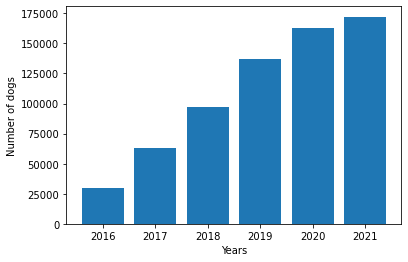

In [83]:
dogs_adopted = dallas_adopted.loc[ dallas_adopted['Animal Type'] == 'DOG']
dog_years = dogs_adopted["Year"]

plt.bar(dog_years,dogs_adopted.index)
plt.xlabel ("Years")
plt.ylabel('Number of dogs')
plt.show()



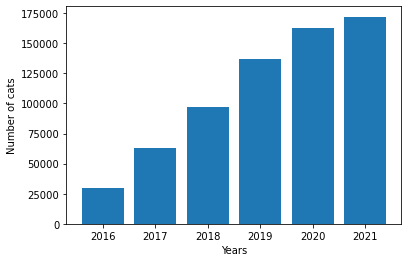

In [81]:
cats_adopted = dallas_adopted.loc[dallas_adopted['Animal Type'] == 'CAT']
cat_years = cats_adopted["Year"]

plt.bar(cat_years,cats_adopted.index)
plt.xlabel ("Years")
plt.ylabel('Number of cats')
plt.show()


In [141]:
dallas_adopted_pivot = dallas_adopted.pivot_table(dallas_adopted,["Year", "Outcome Type",], aggfunc = "count")
dallas_adopted_pivot

Animal Type
Year Outcome Type                  
2016 ADOPTION                  8358
     RETURNED TO OWNER         1899
2017 ADOPTION                  9665
     RETURNED TO OWNER         4171
2018 ADOPTION                 11482
     RETURNED TO OWNER         6338
2019 ADOPTION                 12429
     RETURNED TO OWNER        10283
2020 ADOPTION                  7804
     RETURNED TO OWNER         6041
2021 ADOPTION                  2643
     RETURNED TO OWNER         1673

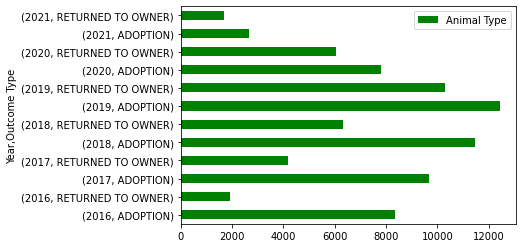

In [162]:
dallas_adopted_pivot.plot(kind ="barh", color = "green")



In [149]:
dallas_adopted_animals = dallas_adopted.pivot_table(dallas_adopted,[ "Year","Animal Type",], aggfunc = "count")
dallas_adopted_animals 

Outcome Type
Year Animal Type              
2016 BIRD                   11
     CAT                  1731
     DOG                  8333
     WILDLIFE              182
2017 BIRD                   15
     CAT                  2063
     DOG                 11613
     LIVESTOCK               5
     WILDLIFE              140
2018 BIRD                   18
     CAT                  2670
     DOG                 14898
     LIVESTOCK               6
     WILDLIFE              228
2019 BIRD                   17
     CAT                  3214
     DOG                 19314
     LIVESTOCK               6
     WILDLIFE              161
2020 BIRD                   10
     CAT                  1958
     DOG                 11756
     LIVESTOCK               4
     WILDLIFE              117
2021 BIRD                    2
     CAT                   536
     DOG                  3751
     LIVESTOCK               3
     WILDLIFE               24

Text(0, 0.5, 'Number of Animals')

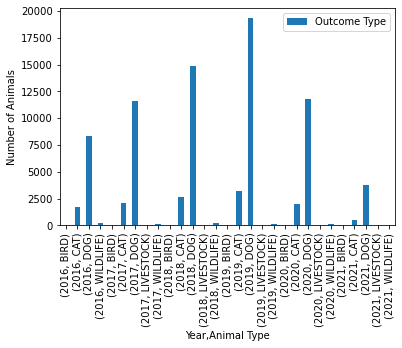

In [165]:
dallas_adopted_animals.plot(kind ="bar")

plt.ylabel ("Number of Animals")

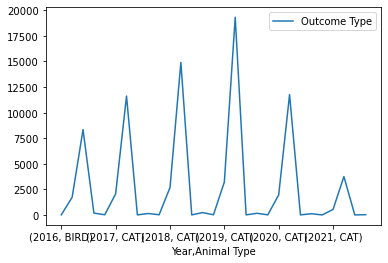

In [157]:
dallas_adopted_animals.plot()

